# Artificial Neural Networks and Deep Learning







---







## Homework 1: Minimal Working Example







To make your first submission, follow these steps:



1. Create a folder named `[2024-2025] AN2DL/Homework 1` in your Google Drive.



2. Upload the `training_set.npz` file to this folder.



3. Upload the Jupyter notebook `Homework 1 - Minimal Working Example.ipynb`.



4. Load and process the data.



5. Implement and train your model.



6. Submit the generated `.zip` file to Codabench.


## ⚙️ Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, ParameterGrid
import matplotlib.pyplot as plt
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import compute_class_weight
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
import keras_cv

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

## Variables 

In [3]:
balance_training = True
max_oversampling = 0.5
learning_rate = 0.001
N_freeze = 230
dropout_rate_last = 0.35 
patience = 25
batch_size = 64
epochs = 200
l2_reg = 0.001

cross_validation = False #NB: true if run cv
test_set_ = True # NB: set this to true if you want the test set, otherwise set to False!!

Define grid for hyperparameter tuning

In [4]:
# transfer_learning_grid = {
#     'learning_rate': [1e-3],
#     'batch_size': [32, 64],
#     'dropout_rate': [0.25, 0.4, 0.55],
#     'patience':[15, 20, 30],
#     'l2_reg': [0.001, 0.0001, 0.01]
    
# }

# fine_tuning_grid = {
#     'learning_rate': [1e-3],
#     'N_freeze': [220, 230, 239],  # freeze last N layers
#     'batch_size': [32, 64,128],
#     'patience':[10, 15, 20]
# }

## ⏳ Load the Data

In [5]:
import os

data = np.load('/kaggle/input/d/alessandrolacava/training-set-hw1/training_set.npz')  # Load the training data here

X = data['images']
Y = data['labels']

print('train datased dim:', X.shape)
print('tet dataset dim:', Y.shape)

train datased dim: (13759, 96, 96, 3)
tet dataset dim: (13759, 1)


In [6]:
labels = {
    0: 'Basophil',
    1: 'Eosinophil',
    2: 'Erythroblast',
    3: 'Immature granulocytes',
    4: 'Lymphocyte',
    5: 'Monocyte',
    6: 'Neutrophil',
    7: 'Platelet'
}

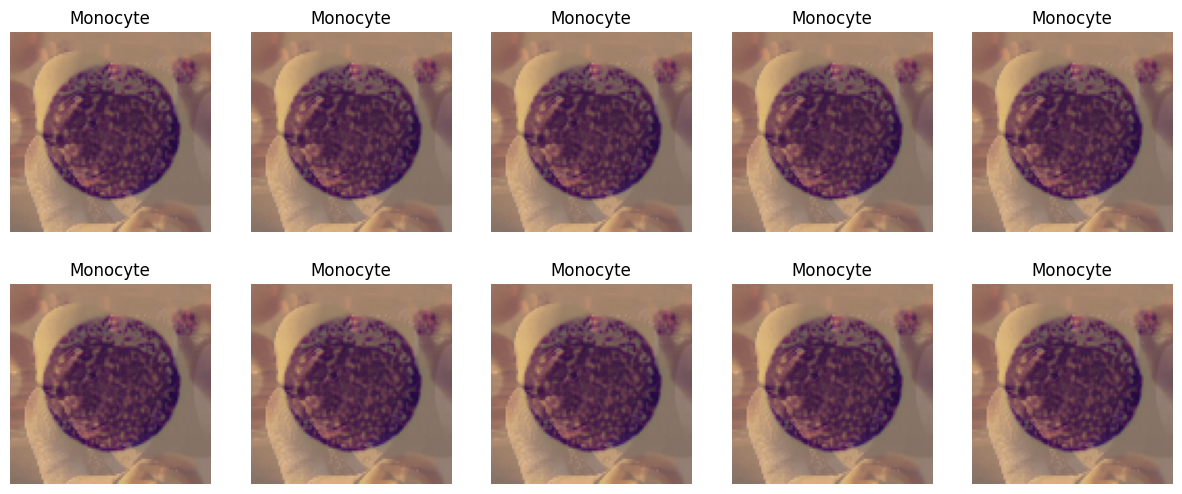

In [7]:
# print the fist image for each class
# show some images and relative labels
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    ax[i // 5, i % 5].imshow(X[i+13000])
    ax[i // 5, i % 5].set_title(labels[Y[i+13000][0]])
    ax[i // 5, i % 5].axis('off')
plt.show()

### Delete shrek and rick

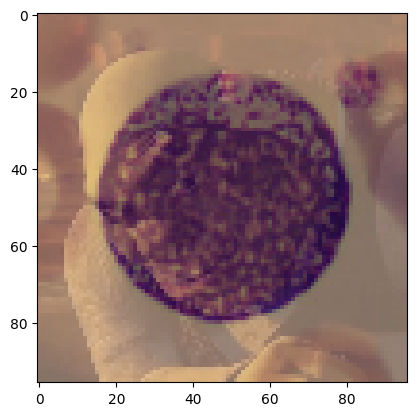

In [8]:
shrek = X[-1800]
plt.imshow(shrek)

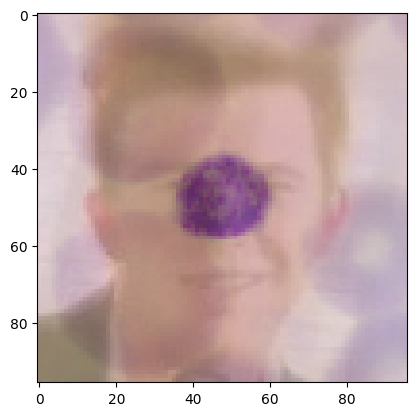

In [9]:
rick = X[-200]
plt.imshow(rick)

In [10]:
X = X[:-1800]
Y = Y[:-1800]

In [11]:
Y = tfk.utils.to_categorical(Y, num_classes=len(labels))

In [12]:
print(Y.shape)
print(X.shape)

(11959, 8)
(11959, 96, 96, 3)


the dataset is highly unbalanced, we could perform oversampling of the minority classes

### Split dataset

In [13]:
if cross_validation:
    print(X.shape, Y.shape)
if test_set_:
    X_d, X_test, Y_d, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)
    X_train, X_valid, Y_train, Y_valid = train_test_split(X_d, Y_d, test_size=0.15, random_state=42)
if (cross_validation == False and test_set_ == False): 
    X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)

### Class Balancing

In [14]:
if cross_validation == False:
    print('sizes train: ', X_train.shape, Y_train.shape)
    print('sizes validation: ', X_valid.shape, Y_valid.shape)

sizes train:  (8640, 96, 96, 3) (8640, 8)
sizes validation:  (1525, 96, 96, 3) (1525, 8)


In [15]:
# def smote(X_train, Y_train):
#     # Flatten images to apply SMOTE
#     X_train_flat = X_train.reshape(X_train.shape[0], 96*96*3)
    
#     # Apply SMOTE on the flattened data
#     from imblearn.over_sampling import SMOTE
#     sm = SMOTE(random_state=2)
#     X_smote, Y_smote = sm.fit_resample(X_train_flat/255.0, Y_train)
    
#     # Reshape back to original image dimensions
#     X_smote = X_smote.reshape(X_smote.shape[0], 96, 96, 3) * 255.0
    
#     print('Sizes after SMOTE - X_train:', X_smote.shape, ', Y_train:', Y_smote.shape)
    
#     plt.stem(Y_smote.sum(axis=0))

#     return X_smote, Y_smote

# if cross_validation == False:
#     X_train, Y_train = smote(X_train, Y_train)

## another way is class_weight in fit
> 
class_weights = scikit_learn.utils.compute_class_weight('balanced', classes = np.unique(data.classes), y=data.classes-
class_weights_dict = dict(enumerate(class_weights.flatten()))then 
ct)
> model_history = model.fit(
      training_set_cm,
      validation_data = validation_set,
      epochs = model_MAX_EPOCHS,
      callbacks = [model_early_stopping],
      class_weight = class_weights_dict
  )

In [16]:
# Assuming Y is one-hot encoded, convert it to a 1D array of class labels
y_labels = np.argmax(Y_train, axis=1)
class_weights = compute_class_weight('balanced', classes=np.unique(y_labels), y=y_labels)
class_weights_dict = dict(enumerate(class_weights.flatten()))

print(y_labels)
print(class_weights_dict)

[6 3 6 ... 1 7 3]
{0: 1.8274111675126903, 1: 0.6861499364675985, 2: 1.3432835820895523, 3: 0.7327001356852103, 4: 1.7475728155339805, 5: 1.5340909090909092, 6: 0.6409495548961425, 7: 0.907563025210084}


## Another way to balancing class (AugMix)

In [17]:
#!pip install augmix-tf

Class counts before augmentation: [ 591. 1574.  804. 1474.  618.  704. 1685. 1190.]
Samples needed for each class: [1094.  111.  881.  211. 1067.  981.    0.  495.]
Balanced dataset shape: (13480, 96, 96, 3) (13480, 8)
Class counts after augmentation: [1685. 1685. 1685. 1685. 1685. 1685. 1685. 1685.]


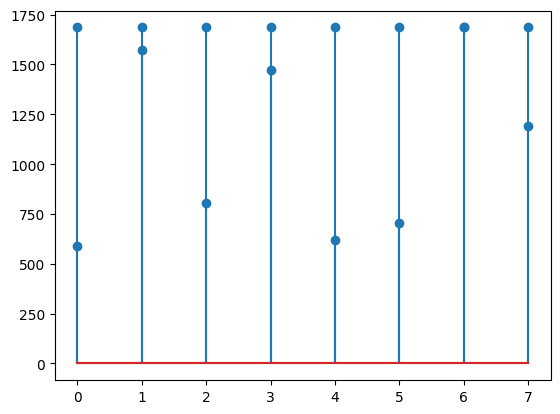

In [18]:
def balance_class(X,Y):
    plt.stem(Y.sum(axis=0))
    class_counts = np.sum(Y, axis=0)
    print("Class counts before augmentation:", class_counts)
    
    max_count = np.max(class_counts)
    remaining = max_count - class_counts
    print("Samples needed for each class:", remaining)
    
    # Set up AugMix layer with desired parameters
    augmix = keras_cv.layers.AugMix([0, 255])
    
    # Initialize augmented data and labels arrays
    augmented = []
    augmented_lbls = []
    
    # Loop through each class and augment to reach target count
    for i in range(8):  # assuming 8 classes
        # Select samples for class `i`
        class_samples = X[Y[:, i] == 1]
        num_to_augment = int(remaining[i])  # Ensure it's an integer
        
        # Get the available sample count and ensure it's an integer
        num_available = int(class_samples.shape[0])
        
        # Adjust num_to_augment if there are fewer samples in class_samples
        if num_to_augment > num_available:
            # Calculate repeats and ensure it's an integer
            repeats = (num_to_augment + num_available - 1) // num_available
            class_samples = np.tile(class_samples, (int(repeats), 1, 1, 1))  # Adjust shape as necessary for your data format
    
        # Now slice the samples to exactly num_to_augment
        class_samples = class_samples[:num_to_augment]
    
        # Perform augmentation if samples are needed for this class
        if num_to_augment > 0:
            # Augment selected samples
            augmented_samples = augmix(class_samples)
            
            # Create one-hot labels for augmented samples
            labels = np.zeros((augmented_samples.shape[0], 8))
            labels[:, i] = 1
            
            # Append to the augmented data and labels
            augmented.append(augmented_samples)
            augmented_lbls.append(labels)
    
    
    
    # Concatenate all augmented samples and labels into arrays
    augmented = np.concatenate(augmented, axis=0)
    augmented_lbls = np.concatenate(augmented_lbls, axis=0)
    
    X_train_balanced = np.concatenate([X, augmented], axis=0)
    Y_train_balanced = np.concatenate([Y, augmented_lbls], axis=0)
    
    print("Balanced dataset shape:", X_train_balanced.shape, Y_train_balanced.shape)
    
    new_class_counts = np.sum(Y_train_balanced, axis=0)
    print("Class counts after augmentation:", new_class_counts)
    plt.stem(Y_train_balanced.sum(axis=0))
    return X_train_balanced, Y_train_balanced

if cross_validation:
    X, Y = balance_class(X,Y)
else:
    X_train,Y_train = balance_class(X_train,Y_train)

In [19]:
# (images, labels), _ = keras.datasets.cifar10.load_data()
# augmix = keras_cv.layers.AugMix([0, 255])
# augmented_images = augmix(images[:100])

## Image normalization

In [20]:
# # common values 
# mean = [0.485, 0.456, 0.406] 
# std = [0.229, 0.224, 0.225]

# def normalize_image(image):
#     image = image / 255.0  # Normalize to [0, 1] first
#     image = (image - mean) / std  # Standardize using ImageNet stats
#     return image

# # Normalize X_train and X_valid using the normalize_image function
# if cross_validation == False:
#     X_train = np.array([normalize_image(img) for img in X_train])
#     X_valid = np.array([normalize_image(img) for img in X_valid])
# else: 
#     X = np.array([normalize_image(img) for img in X])

## 🛠️ Train and Save the Model

maybe i try to use (as professor suggest):
optimizer = Lion(model.parameters(), lr=1e-3, betas=(0.9, 0.99))

faster than Adam!
sparse update
Uses only beta1 (typically set to 0.9 or 0.95)
useful with large model

In [21]:
def build_model_base():
    # Initialise model with pretrained weights, for transfer learning
    base_model = tfk.applications.EfficientNetV2S(
        input_shape=(96, 96, 3),
        include_top=False,
        weights='imagenet',
        pooling='avg',
        # include_preprocessing=True
    )
    
    base_name = base_model.name
    base_model.trainable = False
    
    # Display a summary of the model architecture
    #base_model.summary(expand_nested=True)
    
    # Display model architecture with layer shapes and trainable parameters
    #tfk.utils.plot_model(base_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

    print('number of layers: ',len(base_model.layers)) #num layers

    #set to false trainable
    for layer in base_model.layers:
        layer.trainable=True
    for layer in base_model.layers:
        layer.trainable=False
    
    return base_model, base_name


base_model, base_name = build_model_base()

82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
number of layers:  514


### tl_model

In [22]:
def build_model_tl(learning_rate, base_model, l2_reg):
    # Define input layer with shape matching the input images
    inputs = tfk.Input(shape=(96, 96, 3), name='input_layer')
    
    # Apply data augmentation for training robustness
    augmentation = tf.keras.Sequential([
        tfkl.RandomFlip("horizontal"),              # Flip images horizontally
        tfkl.RandomFlip("vertical"),                # Flip images vertically
        tfkl.RandomTranslation(0.2, 0.2),           # Translate images by up to 20% in both directions
        tfkl.RandomRotation(0.5),                   # Rotate images by up to 50% (in radians)
        tfkl.RandomZoom(0.3, 0.3),                  # Zoom in and out by up to 20%
        tfkl.RandomContrast(0.3),                   # Adjust contrast by a factor of 20%
        tfkl.RandomBrightness(0.3),                 # Adjust brightness by up to 20%
        tfkl.GaussianNoise(0.2),                    # Add Gaussian noise
    ], name='comprehensive_preprocessing')
    
    x = augmentation(inputs)
    x = tf.keras.applications.efficientnet.preprocess_input(x)  # EfficientNet preprocessing 

    # Pass augmented inputs through the feature extractor
    x = base_model(x)
    x = tfkl.Dropout(dropout_rate_last, name='dropout')(x)
   
    x = tfkl.Dense(64, activation='relu', kernel_regularizer=l2(l2_reg), name='dense_with_l2')(x)
    x = tfkl.BatchNormalization(name = 'batch_normalization_1')(x)
    x = tfkl.Dense(64, activation='relu', kernel_regularizer=l2(l2_reg), name='dense_with_l2_2')(x)

    x = tfkl.BatchNormalization(name = 'batch_normalization_2')(x)

    x = tfkl.Dropout(dropout_rate_last, name='dropout_2')(x)
    
    # Add final Dense layer for classification with softmax activation
    outputs = tfkl.Dense(8, activation='softmax', kernel_regularizer=l2(l2_reg), name='dense_output')(x)
    
    # Define the complete model linking input and output
    tl_model = tfk.Model(inputs=inputs, outputs=outputs, name='model')
    
    # Compile the model with categorical cross-entropy loss and Adam optimiser
    tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(learning_rate), metrics=['accuracy'])
    
    # Display a summary of the model architecture
    #tl_model.summary(expand_nested=True)
    
    # Display model architecture with layer shapes and trainable parameters
    #tfk.utils.plot_model(tl_model, expand_nested=True)

    return tl_model

if (cross_validation == False):
    tl_model = build_model_tl(learning_rate, base_model, l2_reg)

In [23]:
def callbacks_def(patience):     # callbacks definition
    reduce_lr = tfk.callbacks.ReduceLROnPlateau(
        monitor='val_loss',             # Monitor validation loss
        factor=0.2,                     # Reduce the learning rate by a factor of 0.2
        patience=patience-2,            # Wait for 5 epochs before reducing the learning rate
        min_lr=1e-8,                    # Minimum learning rate 
        verbose=1
    )
    
    early_stopping = tfk.callbacks.EarlyStopping(
        monitor='val_accuracy', 
        mode='max', 
        patience=patience, 
        restore_best_weights=True
    )
    
    callbacks = [reduce_lr, early_stopping]
    return callbacks

In [24]:
def train_tl_model(batch_size, patience, tl_model, X_train, Y_train, X_valid, Y_valid):
    callbacks = callbacks_def(patience)
    
    # Train the model
    tl_history = tl_model.fit(
        x=X_train,
        y=Y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(X_valid, Y_valid),
        callbacks=[callbacks],
        class_weight = class_weights_dict
    ).history
    
    # Calculate and print the best validation accuracy achieved
    final_val_accuracy = round(max(tl_history['val_accuracy']) * 100, 2)
    print(f'Final validation accuracy: {final_val_accuracy}%')
    
    # Save the trained model to a file, including final accuracy in the filename
    tl_model.save('weights_untuned.keras')
    
    # Free memory by deleting the model instance
    #del tl_model

    return tl_history

    
if (cross_validation == False):
    tl_history = train_tl_model(batch_size, patience, tl_model, X_train, Y_train, X_valid, Y_valid)

Epoch 1/200


2024-11-15 19:46:52.772581: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/model_1/efficientnetv2-s_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


211/211 ━━━━━━━━━━━━━━━━━━━━ 45s 90ms/step - accuracy: 0.3752 - loss: 2.3709 - val_accuracy: 0.7213 - val_loss: 1.0145 - learning_rate: 0.0010
Epoch 2/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.6122 - loss: 1.3962 - val_accuracy: 0.6793 - val_loss: 1.0951 - learning_rate: 0.0010
Epoch 3/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.6609 - loss: 1.2522 - val_accuracy: 0.6813 - val_loss: 1.0689 - learning_rate: 0.0010
Epoch 4/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.6890 - loss: 1.1583 - val_accuracy: 0.6892 - val_loss: 1.0374 - learning_rate: 0.0010
Epoch 5/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.6982 - loss: 1.1318 - val_accuracy: 0.7115 - val_loss: 0.9538 - learning_rate: 0.0010
Epoch 6/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.7087 - loss: 1.0956 - val_accuracy: 0.7344 - val_loss: 0.9014 - learning_rate: 0.0010
Epoch 7/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.7088 - loss: 

In [25]:
# def train_tl_model(batch_size, patience, tl_model, train_set, valid_set):
#     callbacks = callbacks_def(patience)
    
#     # Train the model
#     tl_history = tl_model.fit(
#         train_set,
#         batch_size=batch_size,
#         epochs=epochs,
#         validation_data=valid_set,
#         callbacks=[callbacks],
#         class_weight = class_weights_dict
#     ).history
    
#     # Calculate and print the best validation accuracy achieved
#     final_val_accuracy = round(max(tl_history['val_accuracy']) * 100, 2)
#     print(f'Final validation accuracy: {final_val_accuracy}%')
    
#     # Save the trained model to a file, including final accuracy in the filename
#     tl_model.save('weights_untuned.keras')
    
#     # Free memory by deleting the model instance
#     #del tl_model

#     return tl_history

    
# if (cross_validation == False):
#     tl_history = train_tl_model(batch_size, patience, tl_model, X_train, Y_train, X_valid, Y_valid)

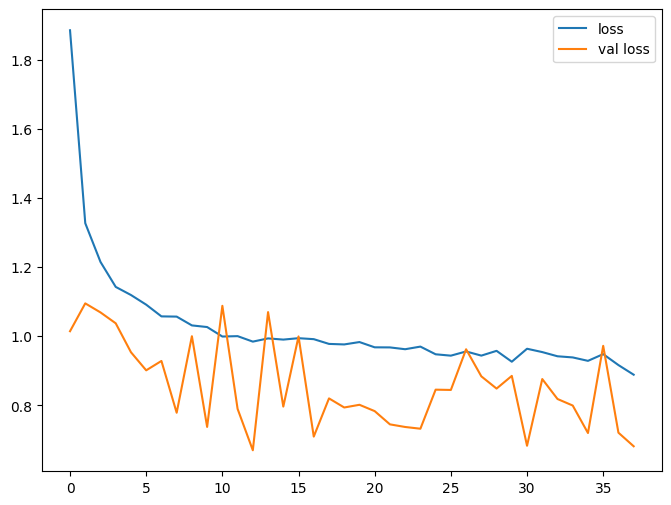

In [26]:
def plot_loss(model, history):
    history.keys()
    
    plt.figure(figsize=(8, 6))
    plt.plot(history['loss'], label='loss')
    plt.plot(history['val_loss'], label='val loss')
    plt.legend()
    plt.show()

if (cross_validation == False):
    plot_loss(tl_model, tl_history)

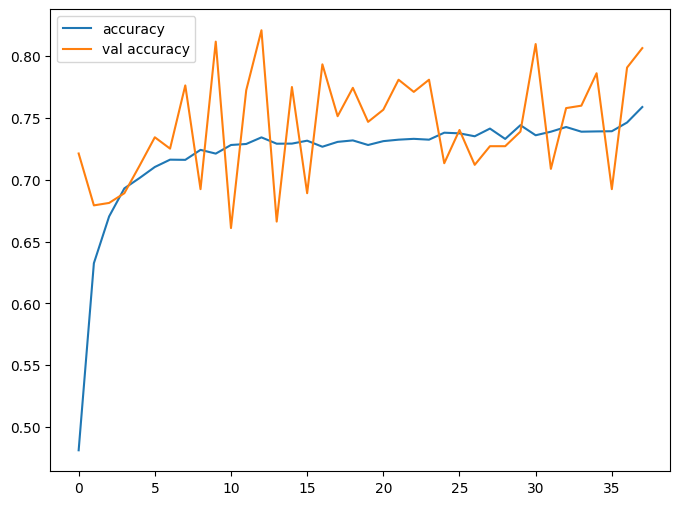

In [27]:
def plot_accuracy(model, history):
    plt.figure(figsize=(8, 6))
    plt.plot(history['accuracy'], label='accuracy')
    plt.plot(history['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.show()

if (cross_validation == False):
    plot_accuracy(tl_model, tl_history)

### ft_model: fine tuning

In [28]:
def num_trainable_layer(model):
    # Contatori per il numero di layer trainabili e non-trainabili
    total_trainable_layers = 0
    total_non_trainable_layers = 0
    
    # Iterare sui layer principali del modello
    for layer in model.layers:
        # Se il layer è un modello (come efficientnetv2-b3), iterare sui suoi layer interni
        if isinstance(layer, tf.keras.Model):
            trainable_count = 0
            non_trainable_count = 0
            for sub_layer in layer.layers:
                if sub_layer.trainable:
                    trainable_count += 1
                    total_trainable_layers += 1
                else:
                    non_trainable_count += 1
                    total_non_trainable_layers += 1
        else:
            # Se non è un modello, considerarlo direttamente come layer principale
            if layer.trainable:
                total_trainable_layers += 1
            else:
                total_non_trainable_layers += 1
    
    # Stampare il totale dei layer trainabili e non trainabili
    print(f"\nTotale: {total_trainable_layers} trainable layers, {total_non_trainable_layers} non-trainable layers")

if (cross_validation == False):
    num_trainable_layer(tl_model)


Totale: 16 trainable layers, 514 non-trainable layers


In [29]:
def buil_model_fine_tuning(learning_rate, N_freeze):
    ft_model = tfk.models.load_model('weights_untuned.keras')
    
    # Set all layers as non-trainable
    for layer in ft_model.get_layer(base_name).layers:
        layer.trainable = False
    
    # Enable training only for Conv2D and DepthwiseConv2D layers
    for i, layer in enumerate(ft_model.get_layer(base_name).layers):
        if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
            layer.trainable = True
            #print(i, layer.name, type(layer).__name__, layer.trainable)
    
    # Set the first N layers as non-trainable
    for i, layer in enumerate(ft_model.get_layer(base_name).layers[:N_freeze]):
        layer.trainable = False

    # Compile the model
    ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(learning_rate), metrics=['accuracy'])

    return ft_model

if (cross_validation == False):
    ft_model = buil_model_fine_tuning(learning_rate, N_freeze)

In [30]:
def train_ft_model(ft_model, batch_size, patience, X_train, Y_train, X_valid, Y_valid):
    callbacks = callbacks_def(patience)
    # Fine-tune the model: TRAINING
    ft_history = ft_model.fit(
        x = X_train,
        y = Y_train,
        batch_size = batch_size,
        epochs = epochs,
        validation_data = (X_valid, Y_valid),
        callbacks = callbacks,
        class_weight = class_weights_dict
    ).history
    
    # Calculate and print the final validation accuracy
    final_val_accuracy = round(max(ft_history['val_accuracy'])* 100, 2)
    print(f'Final validation accuracy: {final_val_accuracy}%')
    
    # Save the trained model to a file with the accuracy included in the filename
    model_filename = 'weights.keras'
    ft_model.save(model_filename)
    
    return ft_history

if (cross_validation == False):
    ft_history = train_ft_model(ft_model, batch_size, patience,  X_train, Y_train, X_valid, Y_valid)

Epoch 1/200


2024-11-15 19:55:25.091042: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/model_1/efficientnetv2-s_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


211/211 ━━━━━━━━━━━━━━━━━━━━ 65s 122ms/step - accuracy: 0.7672 - loss: 0.8848 - val_accuracy: 0.8839 - val_loss: 0.4926 - learning_rate: 0.0010
Epoch 2/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.8892 - loss: 0.4977 - val_accuracy: 0.7895 - val_loss: 0.7703 - learning_rate: 0.0010
Epoch 3/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9075 - loss: 0.4112 - val_accuracy: 0.9449 - val_loss: 0.2532 - learning_rate: 0.0010
Epoch 4/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9183 - loss: 0.3593 - val_accuracy: 0.9259 - val_loss: 0.3171 - learning_rate: 0.0010
Epoch 5/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9258 - loss: 0.3177 - val_accuracy: 0.8833 - val_loss: 0.4045 - learning_rate: 0.0010
Epoch 6/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9355 - loss: 0.2882 - val_accuracy: 0.8898 - val_loss: 0.4369 - learning_rate: 0.0010
Epoch 7/200
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9326 - loss:

In [31]:
# def train_ft_model(ft_model, batch_size, patience, train_set, valid_set):
#     callbacks = callbacks_def(patience)
#     # Fine-tune the model: TRAINING
#     ft_history = ft_model.fit(
#         train_set,
#         batch_size = batch_size,
#         epochs = epochs,
#         validation_data = valid_set,
#         callbacks = callbacks,
#         class_weight = class_weights_dict
#     ).history
    
#     # Calculate and print the final validation accuracy
#     final_val_accuracy = round(max(ft_history['val_accuracy'])* 100, 2)
#     print(f'Final validation accuracy: {final_val_accuracy}%')
    
#     # Save the trained model to a file with the accuracy included in the filename
#     model_filename = 'weights.keras'
#     ft_model.save(model_filename)
    
#     return ft_history

# if (cross_validation == False):
#     ft_history = train_ft_model(ft_model, batch_size, patience,  X_train, Y_train, X_valid, Y_valid)

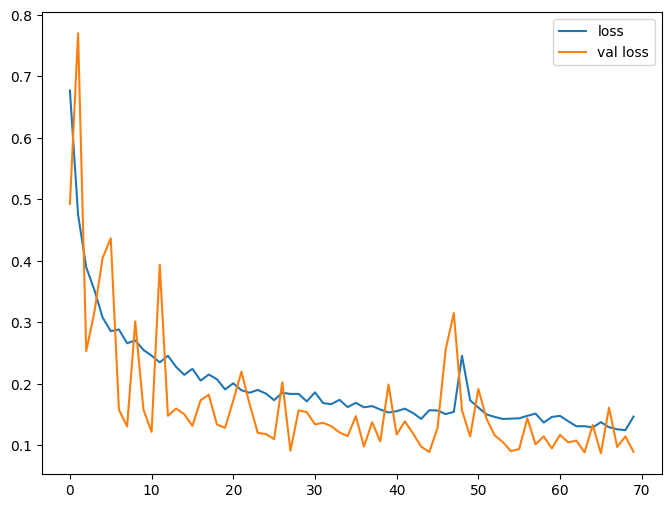

In [32]:
if (cross_validation == False):
    plot_loss(ft_model, ft_history)

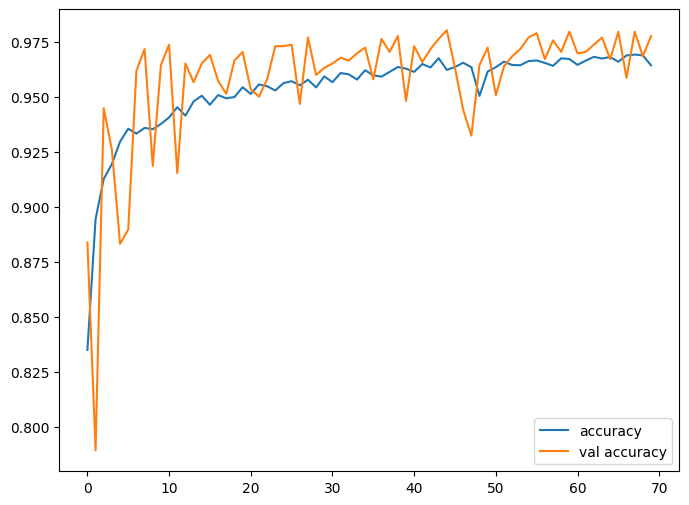

In [33]:
if (cross_validation == False):
    plot_accuracy(ft_model, ft_history)

## Hyperparameters tuning with Grid Search

In [34]:
# # Initialize best score tracking
# best_score = -1
# best_params = None

# # Grid search over transfer learning phase parameters
# for transfer_params in ParameterGrid(transfer_learning_grid):
#     print(f"Testing Transfer Learning Params: {transfer_params}")

#     # Build Base model
#     base_model, base_name = build_model_base()
    
#     # Build and compile model for transfer learning
#     tl_model = build_model_tl(transfer_params['learning_rate'], base_model, transfer_params['l2_reg'])
    
#     # Transfer learning phase
#     tl_history = train_tl_model(transfer_params['batch_size'], transfer_params['patience'], tl_model)

#     #plot 
#     plot_loss(tl_model, tl_history)
#     plot_accuracy(tl_model, tl_history)

#     # Grid search over fine-tuning parameters
#     for fine_params in ParameterGrid(fine_tuning_grid):
#         print(f"Testing Fine Tuning Params: {fine_params}")
        
#         ft_model = buil_model_fine_tuning(fine_params['learning_rate'], fine_params['N_freeze'])
                
#         # Fine-tuning phase
#         ft_history = train_ft_model(ft_model, batch_size, patience)

#         #plot 
#         plot_loss(ft_model, ft_history)
#         plot_accuracy(ft_model, ft_history)

        
#         # Evaluate and track the best model based on validation accuracy
#         val_accuracy = max(ft_history['val_accuracy'])
#         if val_accuracy > best_score:
#             best_score = val_accuracy
#             best_params = {**transfer_params, **fine_params}

# print(f"Best parameters: {best_params} with validation accuracy: {best_score}")

## keras_cv (crossvalidation)

In [35]:
if cross_validation:
# Assuming labels is a dictionary with the class labels as keys and one-hot encoded vectors as values
    sample_label = list(labels.values())[0]  # Get a sample one-hot vector from the dictionary
    num_classes = len(sample_label)  # Number of classes is the length of the one-hot vector
    print(num_classes)

In [36]:
if cross_validation:
    class_labels = list(labels.keys())  # Extract class names or indices
    print(class_labels)

In [37]:
from sklearn.model_selection import KFold, ParameterGrid
import numpy as np

if cross_validation:
    # Initialize best score tracking
    best_score = -1
    best_params = None
    n_splits = 5  # Define the number of K-folds for cross-validation
    
    # Cross-validate over transfer learning and fine-tuning parameters
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Accumulate validation accuracies for each fold
    fold_accuracies = []
    confusion_matrices = []
    
    # Perform K-fold cross-validation
    for fold, (train_index, val_index) in enumerate(kf.split(X)):  # Use your data, X, and y
        print(f"Fold {fold + 1}/{n_splits}")

        # Split the data for this fold
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = Y[train_index], Y[val_index]
    
        # Build Base model
        base_model, base_name = build_model_base()
    
        # Build and compile model for transfer learning ###############################
        tl_model = build_model_tl(learning_rate, base_model, l2_reg)

        # Transfer learning phase
        tl_history = train_tl_model(batch_size, patience, tl_model, X_train, y_train, X_val, y_val)
    
        # Plot transfer learning history
        plot_loss(tl_model, tl_history)
        plot_accuracy(tl_model, tl_history)
    
        # Fine Tuning ##################################################################
        ft_model = buil_model_fine_tuning(learning_rate, N_freeze)
        
        # Fine-tuning phase
        ft_history = train_ft_model(ft_model, batch_size, patience, X_train, y_train, X_val, y_val)
    
        # Plot fine-tuning history
        plot_loss(ft_model, ft_history)
        plot_accuracy(ft_model, ft_history)
    
        # Predict on validation data ###################################################
        y_pred = np.argmax(ft_model.predict(X_val), axis=1)
        y_true = np.argmax(y_val, axis=1)
        print(y_true)
        print(y_pred)
        
        # Calculate confusion matrix for the fold
        cm = confusion_matrix(y_true, y_pred)
        confusion_matrices.append(cm)
    
        # Display the confusion matrix for this fold
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
        plt.xlabel("Predicted labels")
        plt.ylabel("True labels")
        plt.title(f"Confusion Matrix - Fold {fold + 1}")
        plt.show()
        # Evaluate the model on the validation set for this fold
        val_accuracy = max(ft_history['val_accuracy'])
        fold_accuracies.append(val_accuracy)

In [38]:
if cross_validation:
# Average validation accuracy across folds for the current parameter combination
    mean_val_accuracy = np.mean(fold_accuracies)
    print(f"Mean validation accuracy across folds: {mean_val_accuracy}")
    
    
    # Track the best model based on validation accuracy
    if mean_val_accuracy > best_score:
        best_score = mean_val_accuracy
        best_params = {
            'learning_rate': learning_rate,
            'batch_size': batch_size,
            'N_freeze': N_freeze,
        }
    
    print(f"Best parameters: {best_params} with cross-validated accuracy: {best_score}")

## Model Test: prediction

In [39]:
if test_set_:
    model = ft_model

In [40]:
if test_set_:
    # Predict labels for the entire test set
    predictions = model.predict(X_test, verbose=0)
    
    # Display the shape of the predictions
    print("Predictions Shape:", predictions.shape)

Predictions Shape: (1794, 8)


Accuracy score over the test set: 0.9755
Precision score over the test set: 0.9761
Recall score over the test set: 0.9755
F1 score over the test set: 0.9754


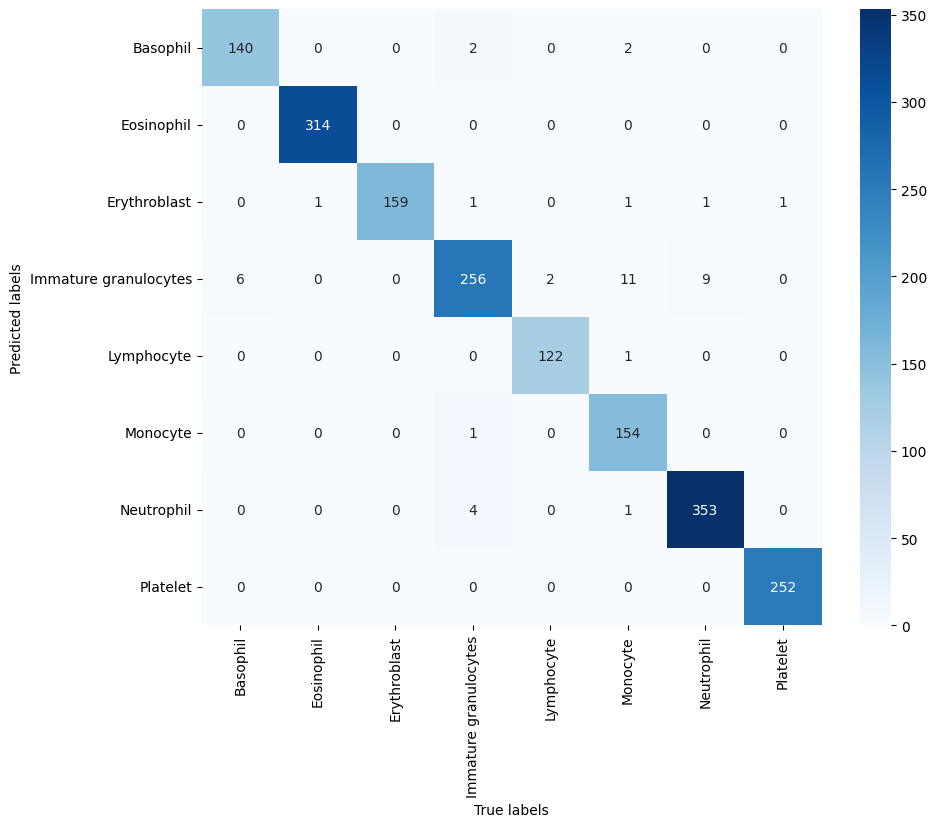

In [41]:
if test_set_:
    
    # Convert predictions to class labels
    pred_classes = np.argmax(predictions, axis=-1)
    
    # Extract ground truth classes
    true_classes = np.argmax(Y_test, axis=-1)
    
    # Calculate and display test set accuracy
    accuracy = accuracy_score(true_classes, pred_classes)
    print(f'Accuracy score over the test set: {round(accuracy, 4)}')
    
    # Calculate and display test set precision
    precision = precision_score(true_classes, pred_classes, average='weighted')
    print(f'Precision score over the test set: {round(precision, 4)}')
    
    # Calculate and display test set recall
    recall = recall_score(true_classes, pred_classes, average='weighted')
    print(f'Recall score over the test set: {round(recall, 4)}')
    
    # Calculate and display test set F1 score
    f1 = f1_score(true_classes, pred_classes, average='weighted')
    print(f'F1 score over the test set: {round(f1, 4)}')
    
    # Compute the confusion matrix
    cm = confusion_matrix(true_classes, pred_classes)
    
    # Combine numbers and percentages into a single string for annotation
    annot = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm.T, annot=annot, fmt='', xticklabels=list(labels.values()), yticklabels=list(labels.values()), cmap='Blues')
    plt.xlabel('True labels')
    plt.ylabel('Predicted labels')
    plt.show()

## 📊 Prepare Your Submission







To prepare your submission, create a `.zip` file that includes all the necessary code to run your model. It **must** include a `model.py` file with the following class:







```python



# file: model.py



class Model:



    def __init__(self):



        """Initialize the internal state of the model."""







    def predict(self, X):



        """Return a numpy array with the labels corresponding to the input X."""



```







The next cell shows an example implementation of the `model.py` file, which includes loading model weights from the `weights.keras` file and conducting predictions on provided input data. The `.zip` file is created and downloaded in the last notebook cell.







❗ Feel free to modify the method implementations to better fit your specific requirements, but please ensure that the class name and method interfaces remain unchanged.

In [42]:
neural_network = tfk.models.load_model('weights.keras')

preds = neural_network.predict(X)

preds = np.argmax(preds, axis=1)

374/374 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step


In [43]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(np.argmax(Y, axis=1),preds)
acc

0.9821891462496865

In [44]:
%%writefile model.py

import numpy as np
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.
        The following is an example loading the weights of a pre-trained
        model.
        """
        self.neural_network = tfk.models.load_model('weights.keras')

    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must no be one-hot
        encoded.
        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        preds = self.neural_network.predict(X)
        preds = np.argmax(preds, axis=1)
        return preds

Writing model.py


In [45]:
from datetime import datetime

filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'
print(filename)

# Add files to the zip command if needed
!zip {filename} model.py weights.keras

# from google.colab import files
# files.download(filename)

submission_241115_202041.zip


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: model.py (deflated 56%)
  adding: weights.keras (deflated 8%)
